In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [2]:
hists={}
pd = []
year = 'temp2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [3]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [4]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

MonoJet_Mzprime_500_Mchi_150 308220.1226196289


In [5]:
process = hist.Cat("process", "Process", sorting='placement')

#process_cats = ("pdataset",)
#process_map = OrderedDict()
#process_map["TT"] = ("TT*",)

signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
#signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
#signal_map["Mhs_70"] = ("*Mhs_70*",)
#signal_map["Mhs_90"] = ("*Mhs_90*",)
#signal_map["MonoJet"] = ("MonoJet*",)  ## signals
#signal_map["MonoW"] = ("MonoW*",)    ## signals
#signal_map["MonoZ"] = ("MonoZ*",)    ## signals
#signal_map["Monojet"] = ("Monojet*",)  ## signals
signal_map["MonoJet"] = ("MonoJet_Mzprime_500_Mchi_150*",)  ## signals

signal_hists = {}

for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    #hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
diledphi
ledphi
mindR
diledR
ledR
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
dielemass
mu1pt
mu1eta
mu1phi
dimumass
TopTagger
DarkHiggsTagger
VvsQCDTagger
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers
recoilVSmindphi


In [6]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [7]:
region = 'iszeroL'
jet_selection = 'baggy'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')

for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
MonoJet 73896.3
------------------
------------------



In [8]:
region = 'iszeroL'
jet_selection = 'baggy_noHEMj'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')

for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
MonoJet 71793.0
------------------
------------------



/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


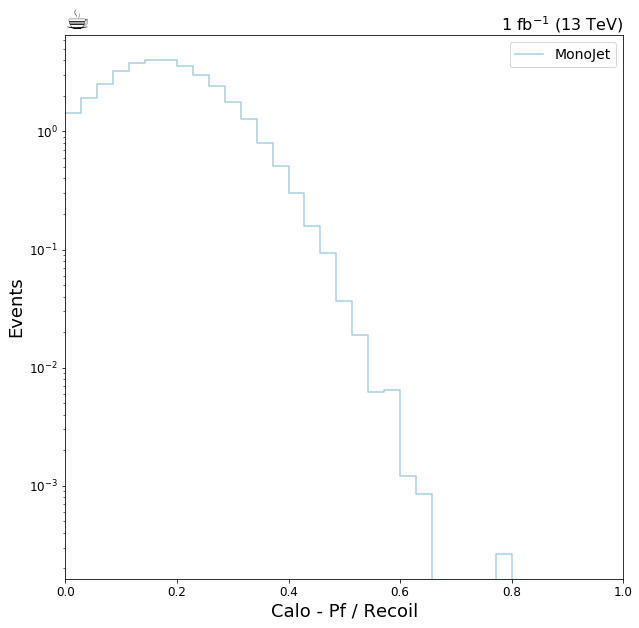

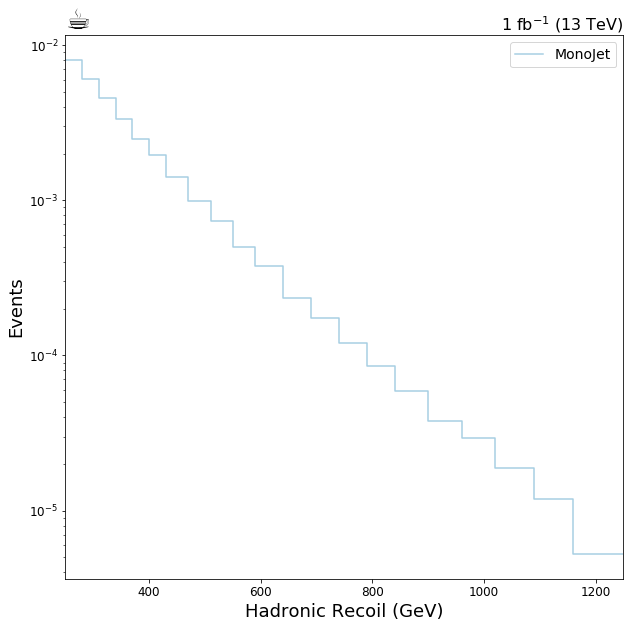

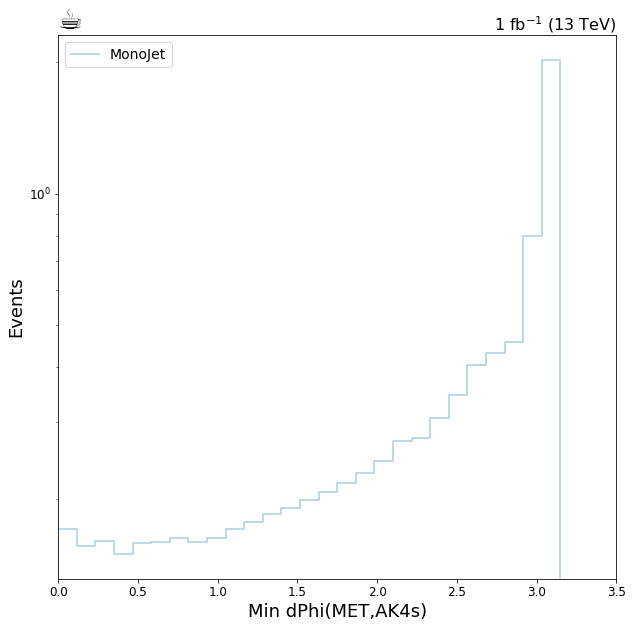

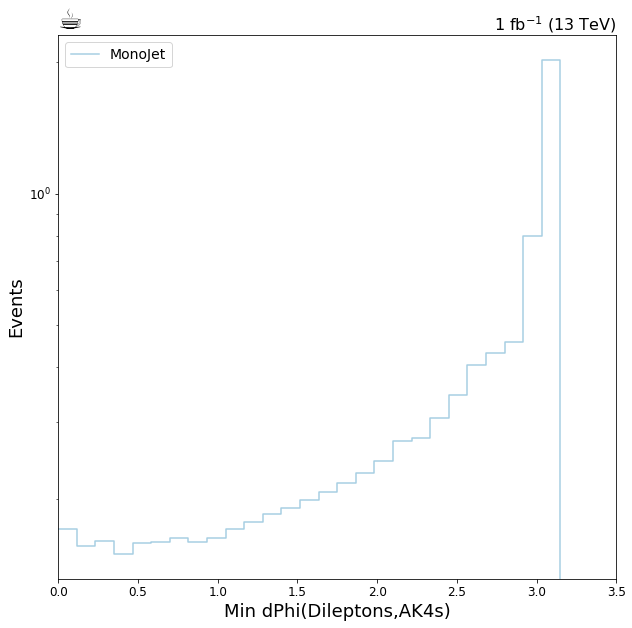

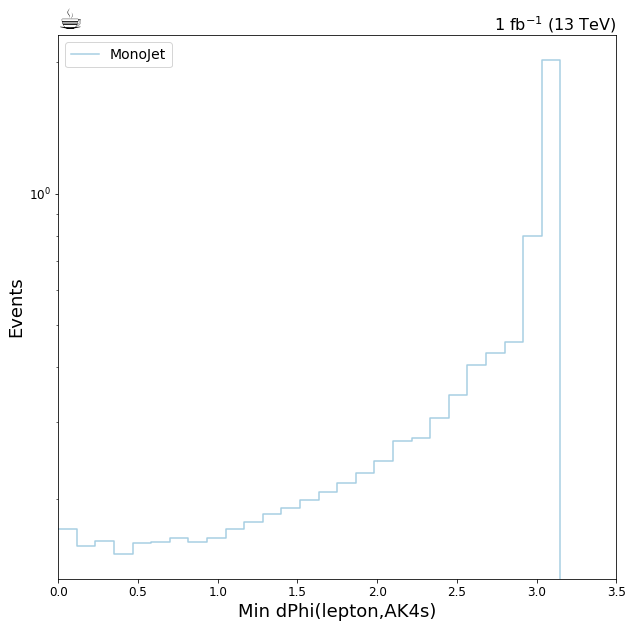

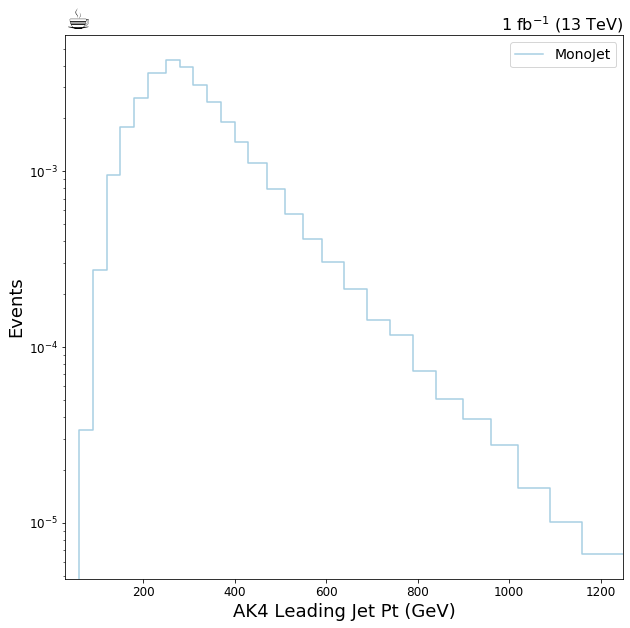

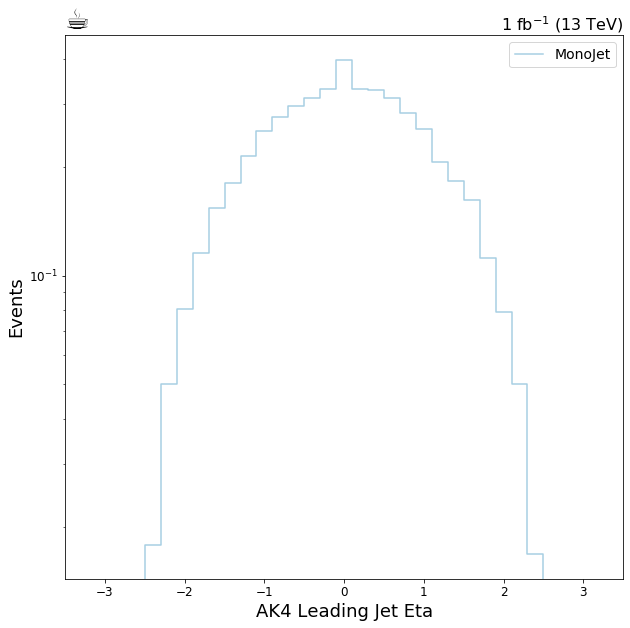

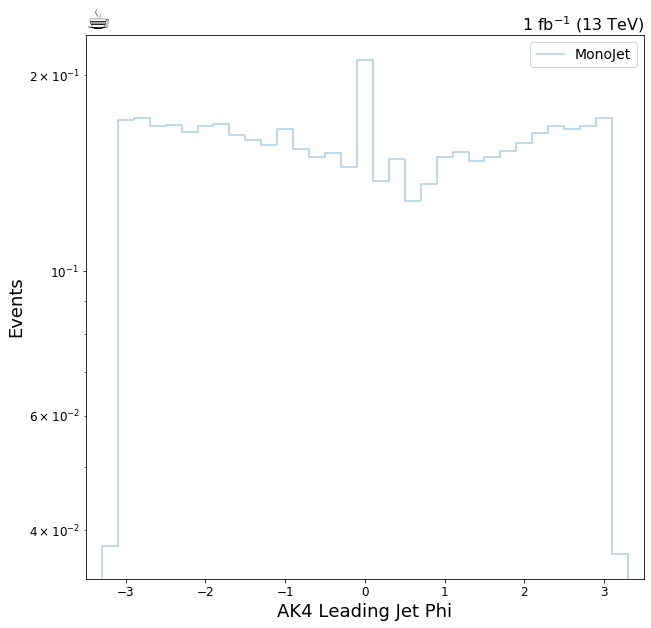

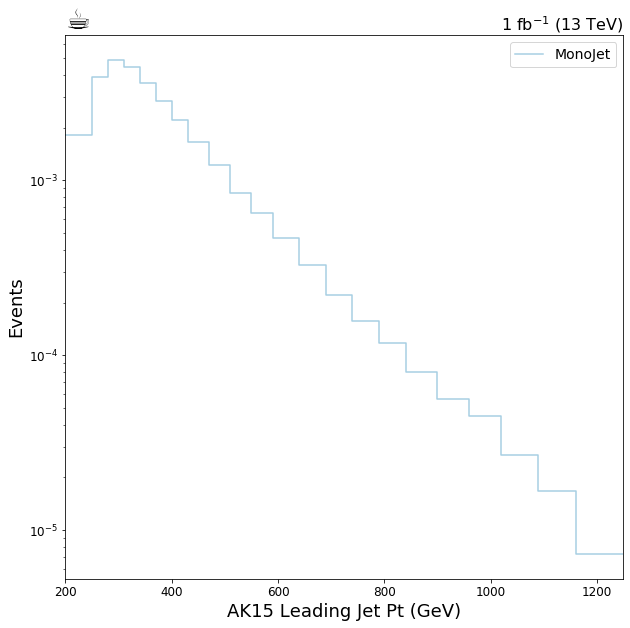

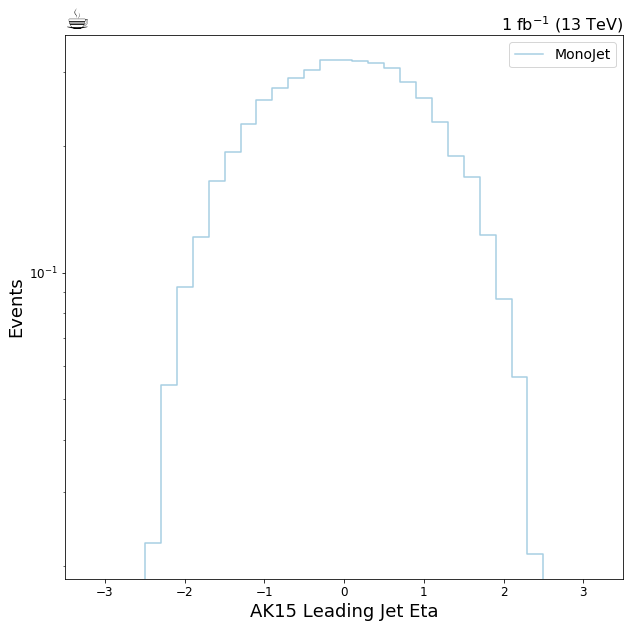

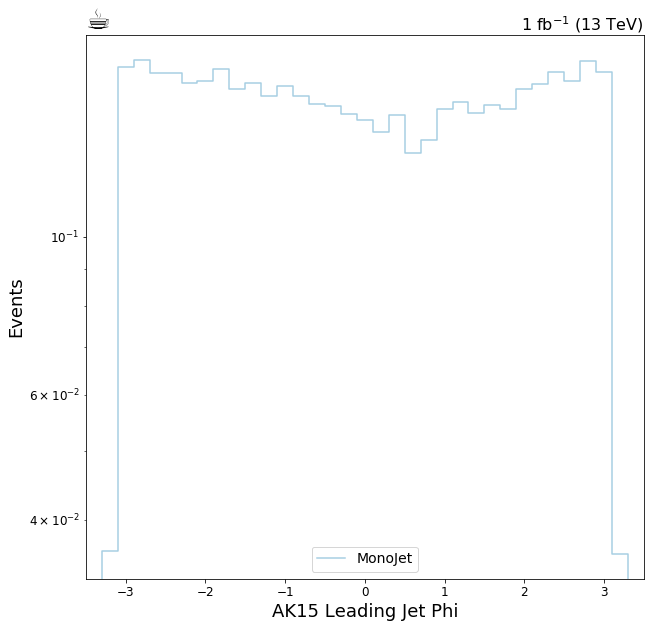

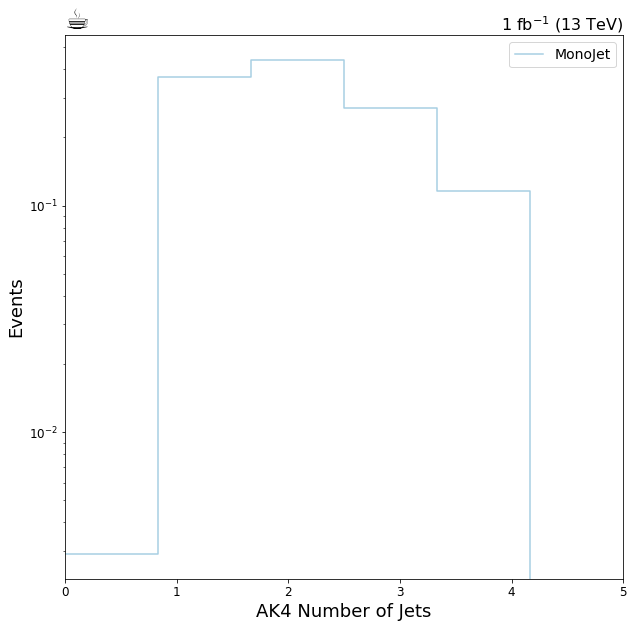

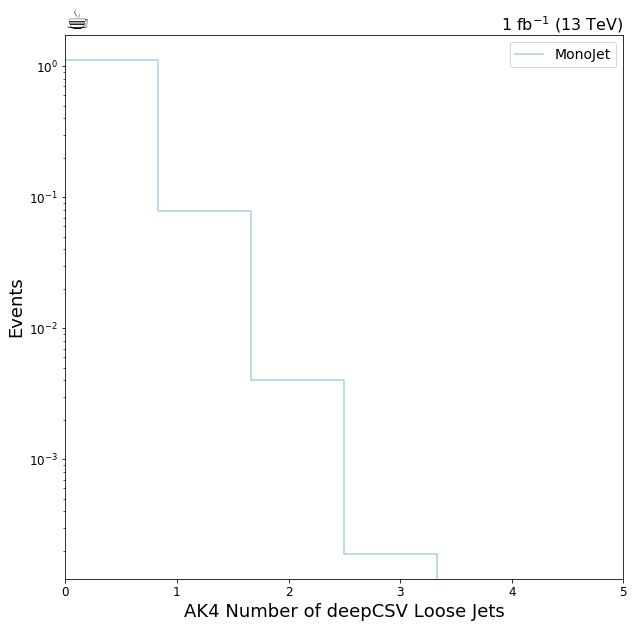

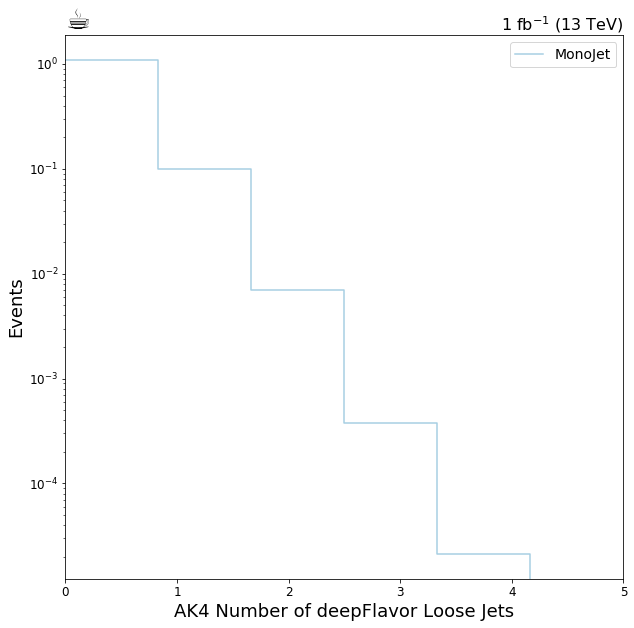

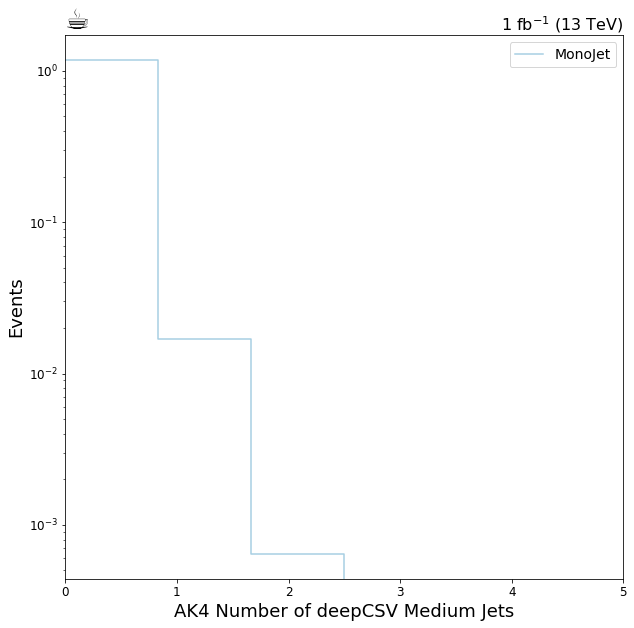

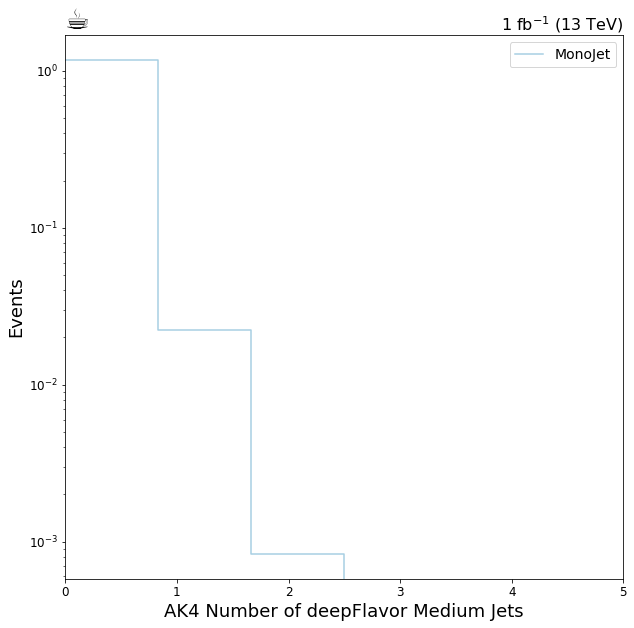

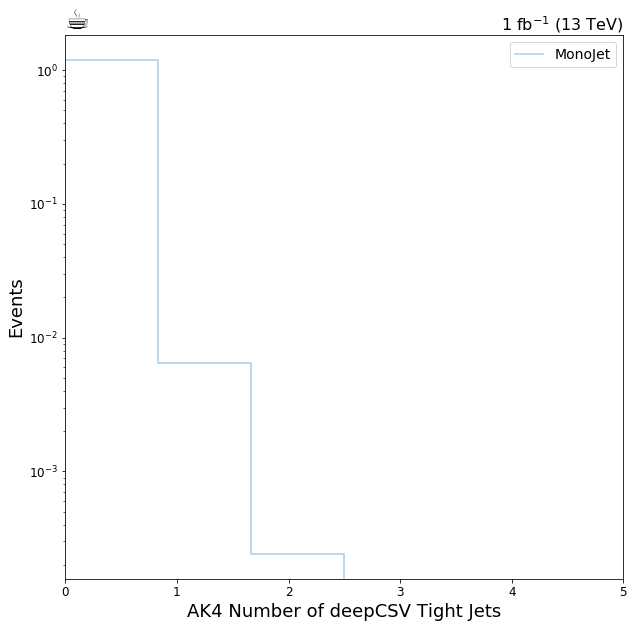

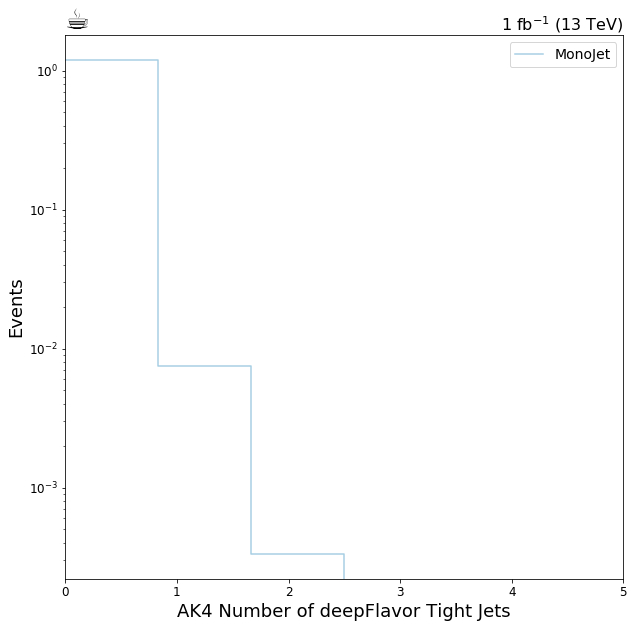

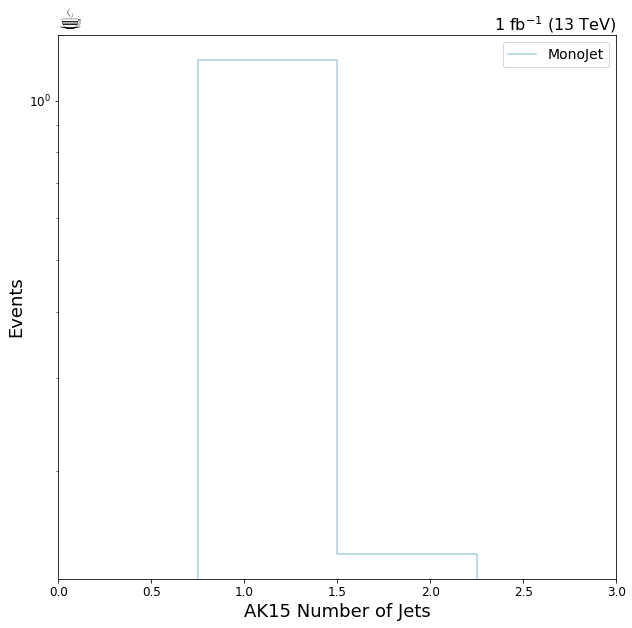

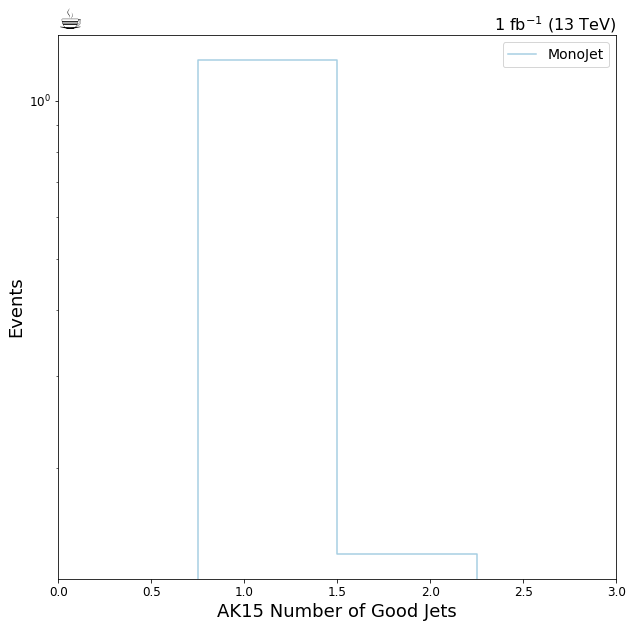

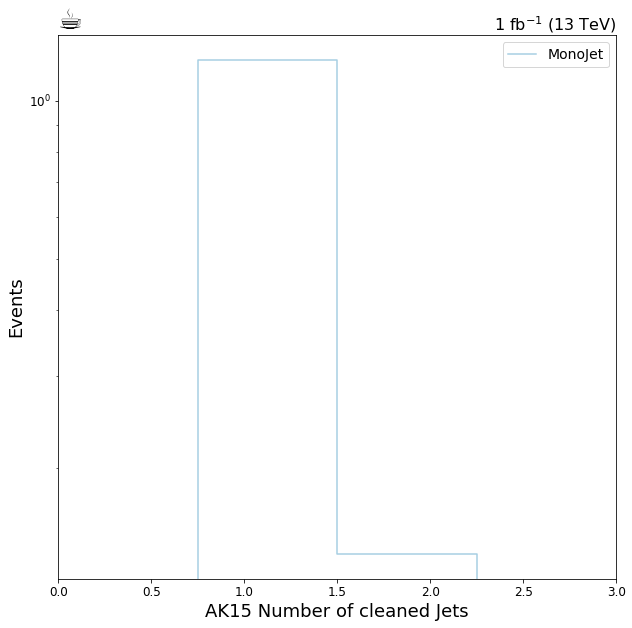

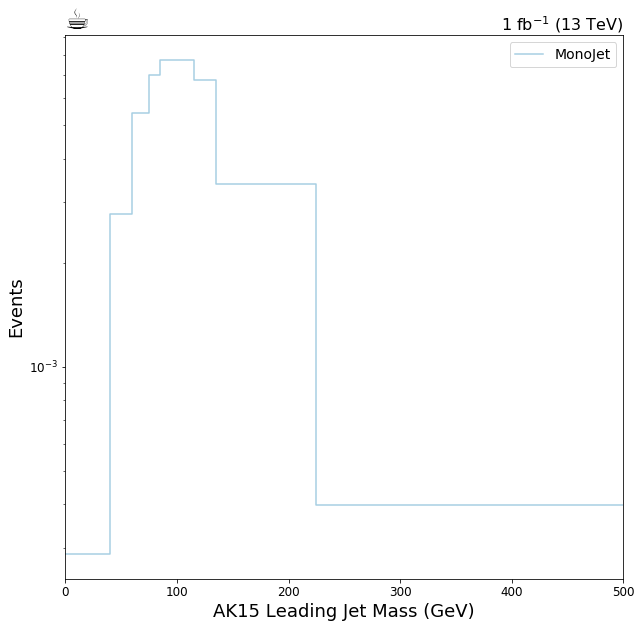

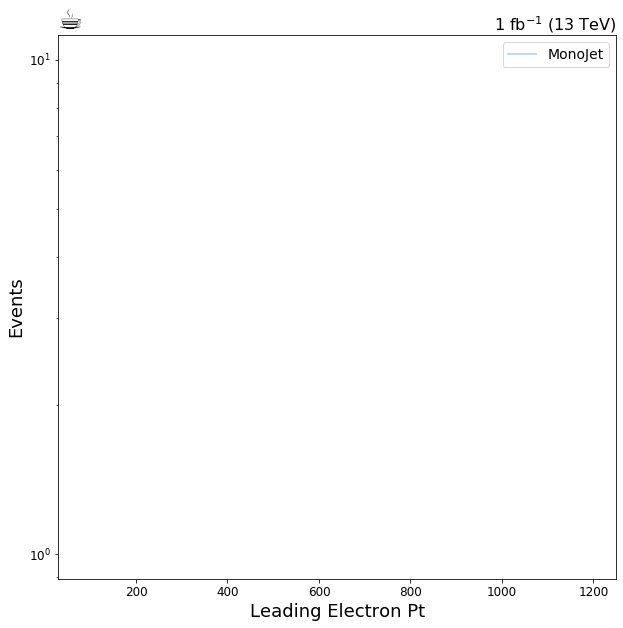

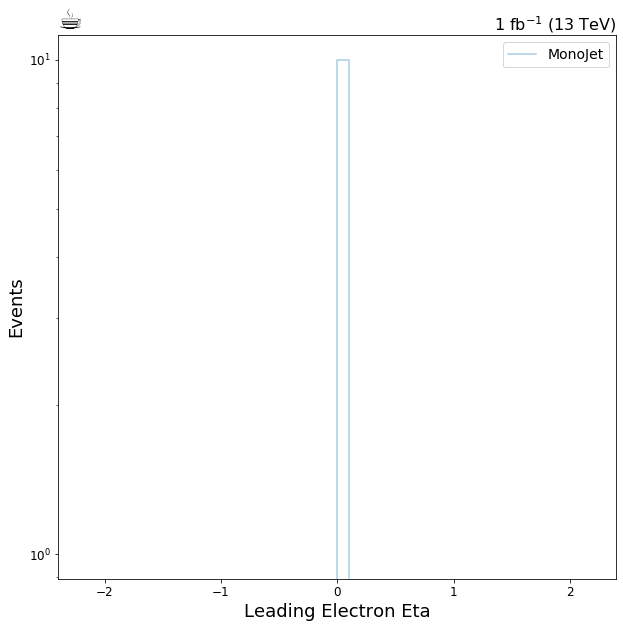

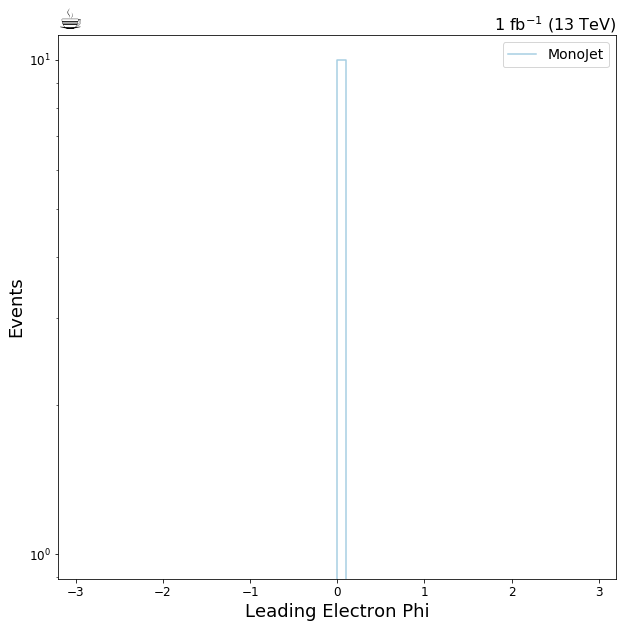

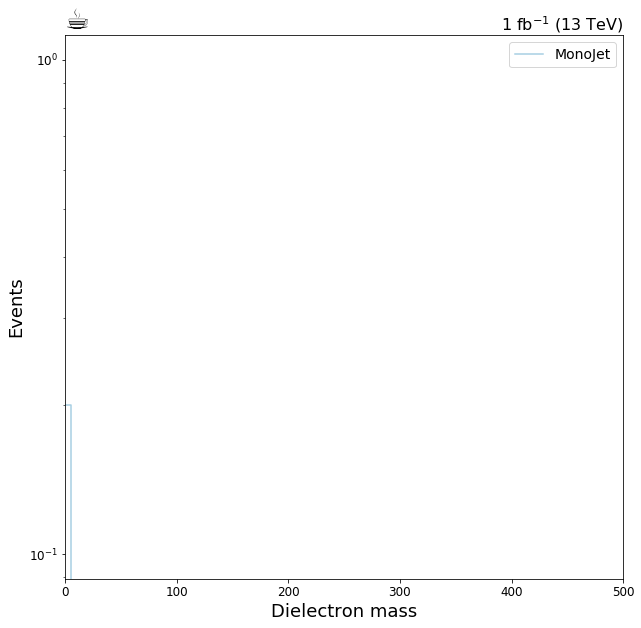

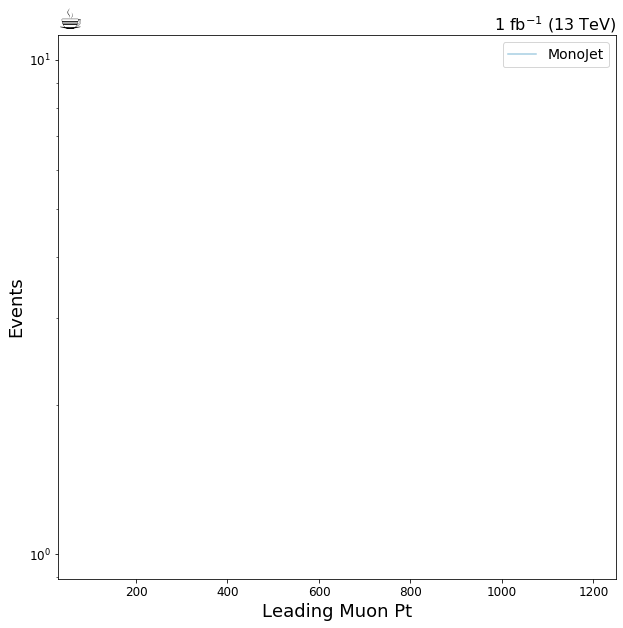

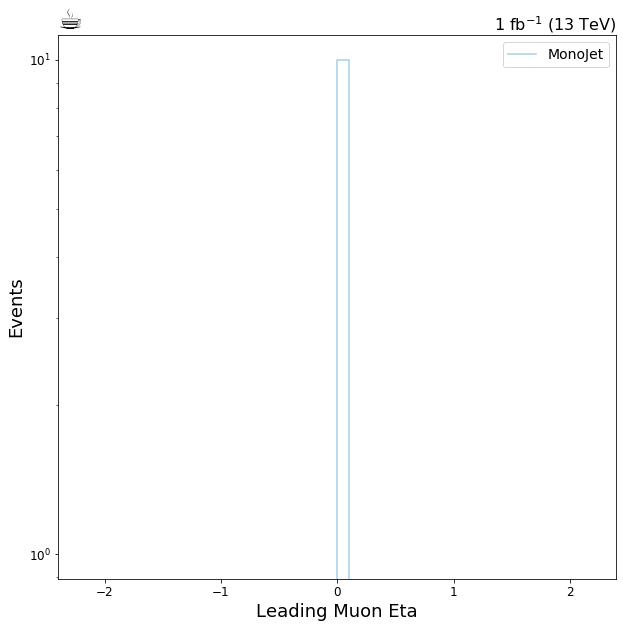

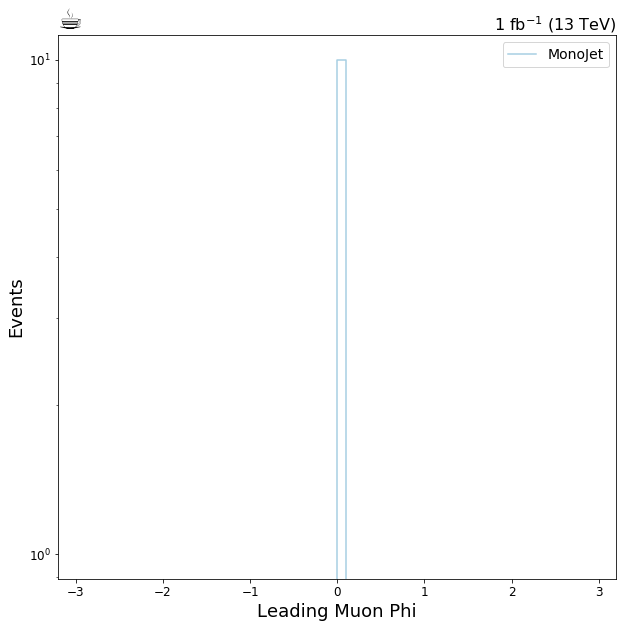

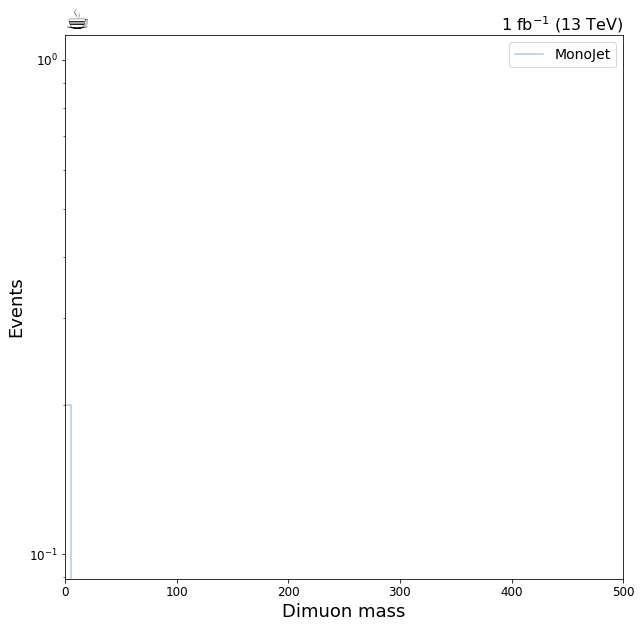

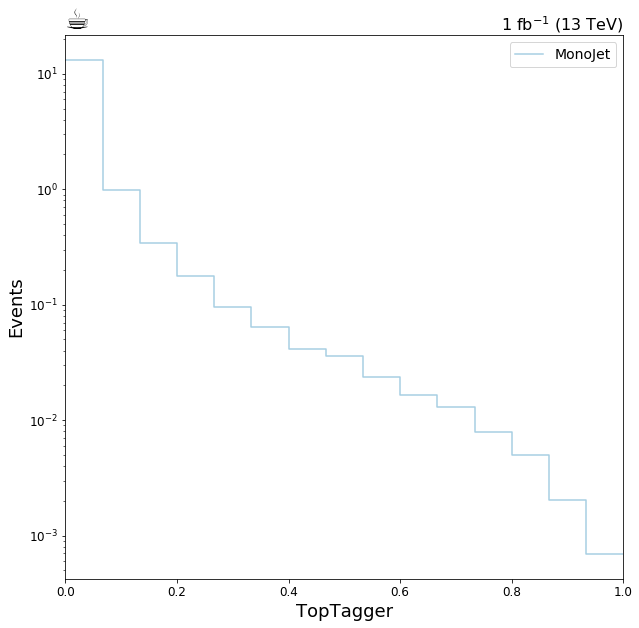

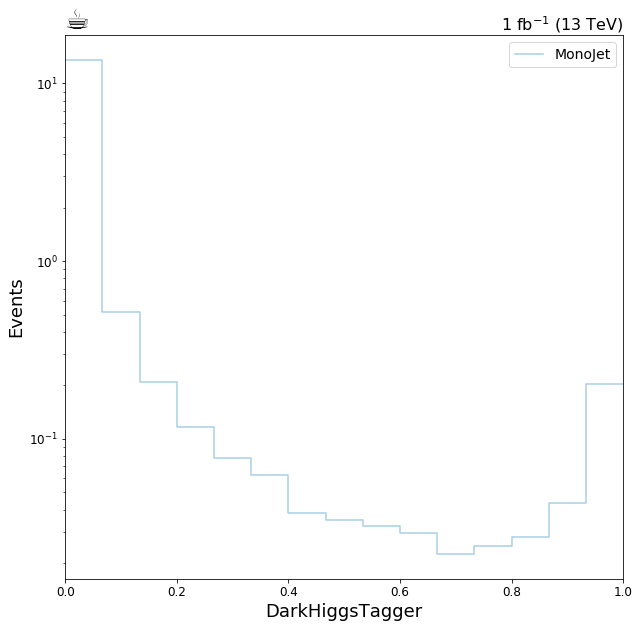

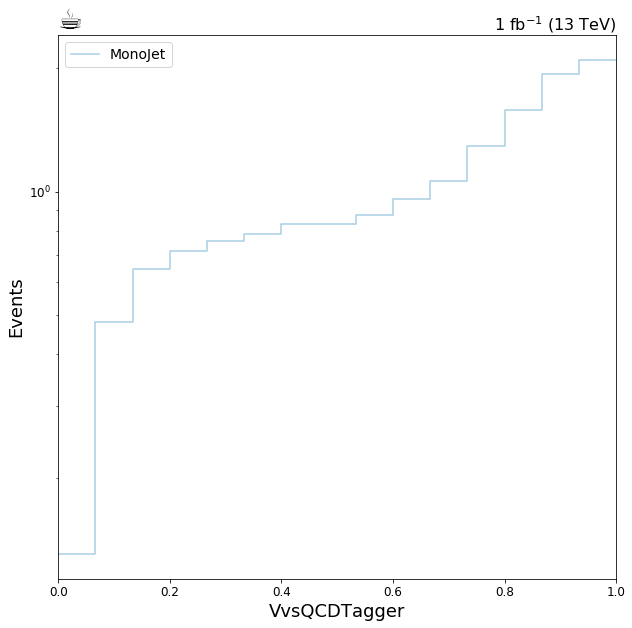

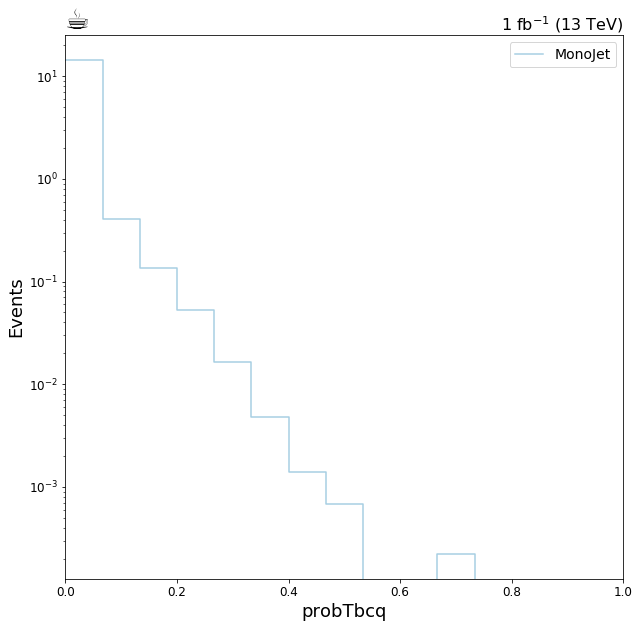

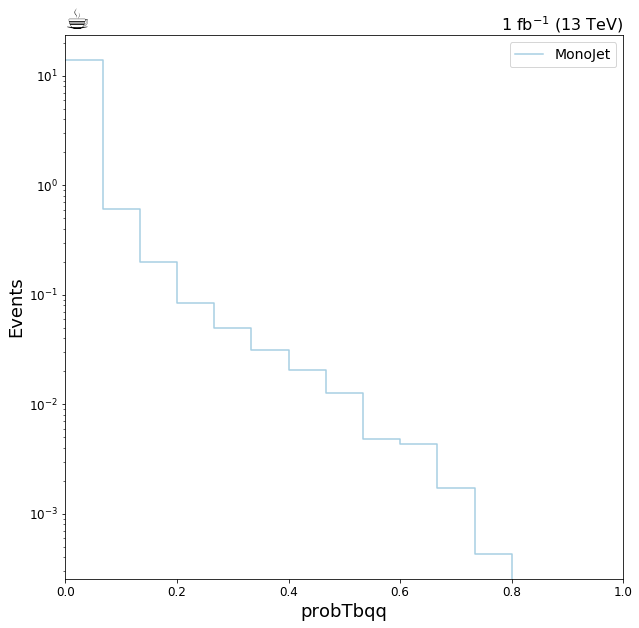

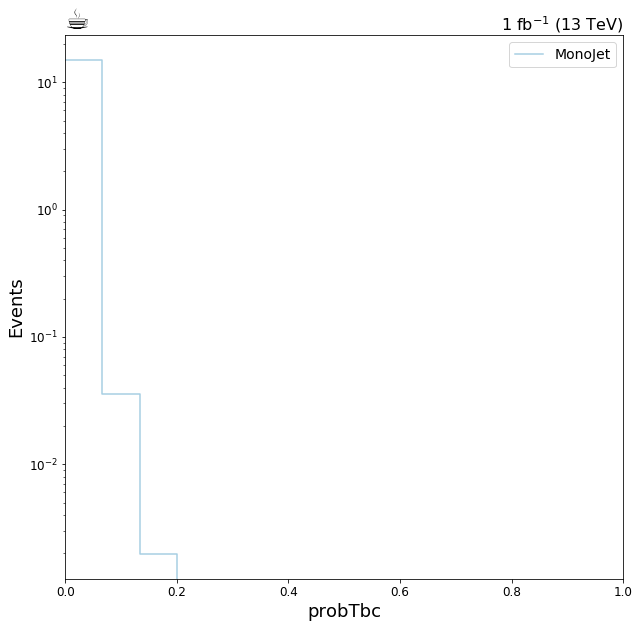

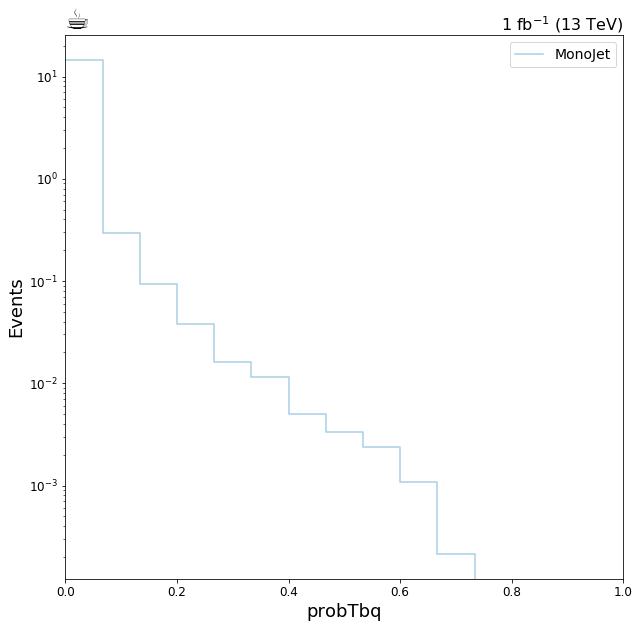

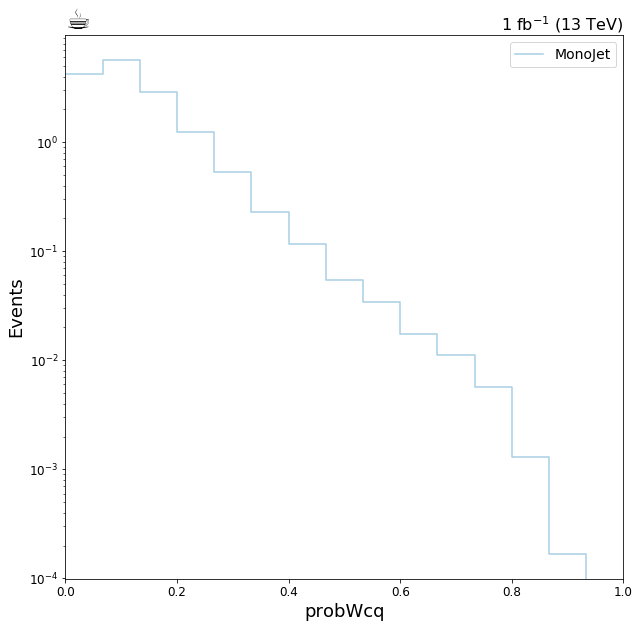

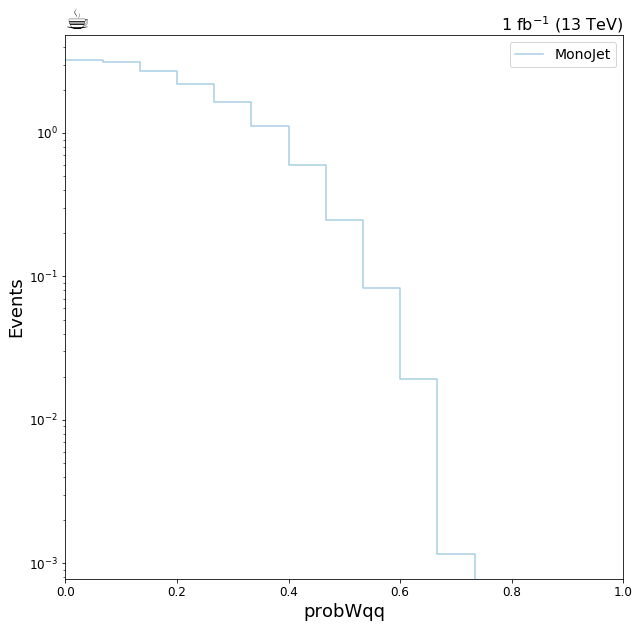

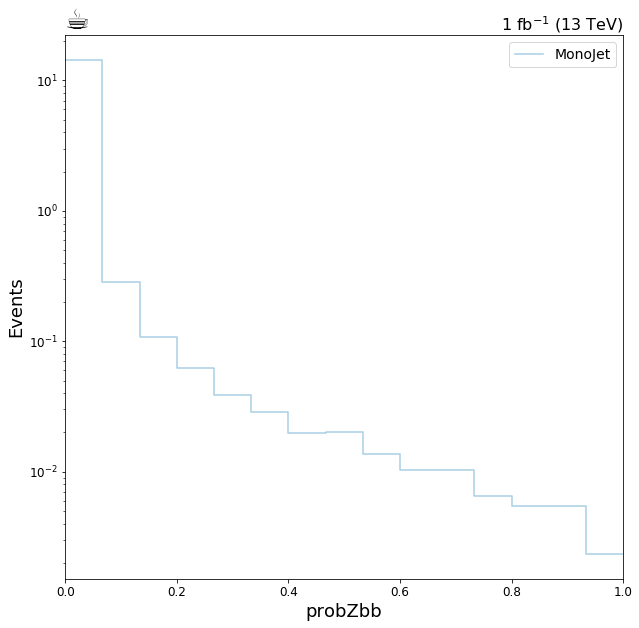

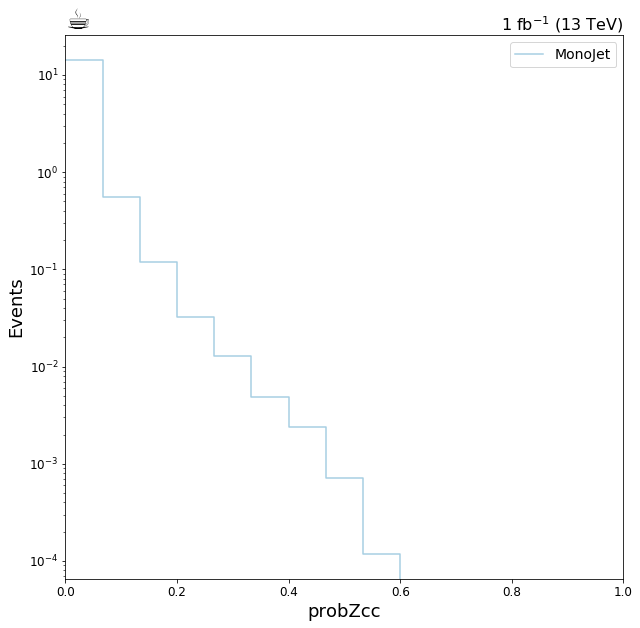

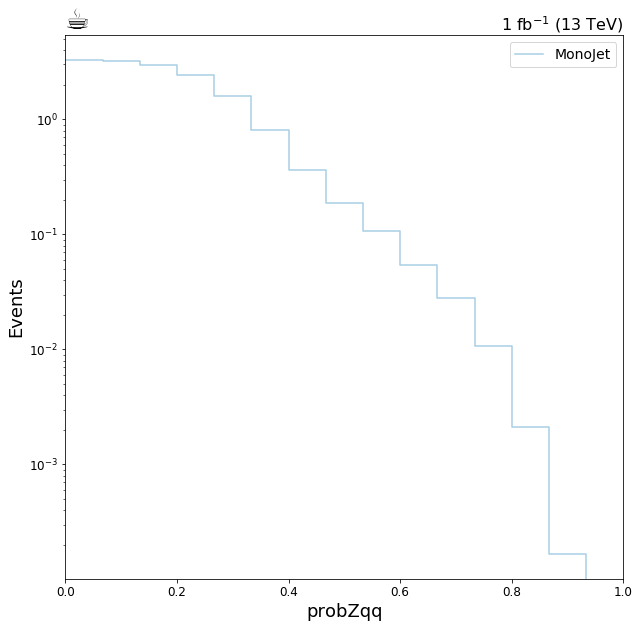

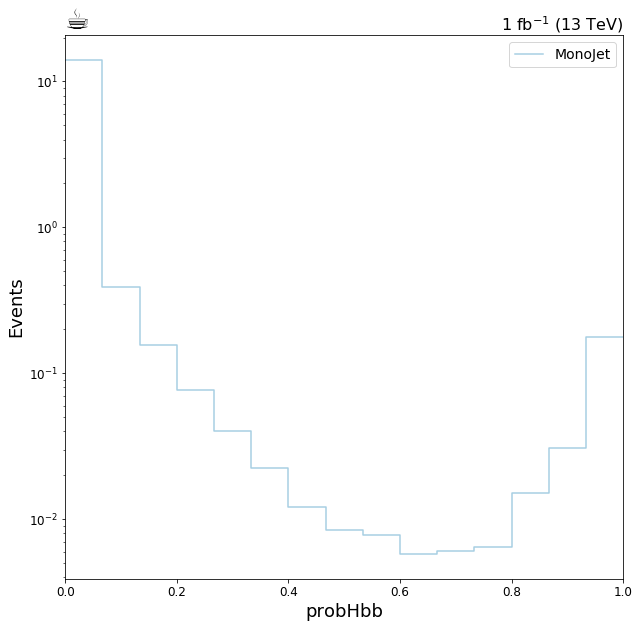

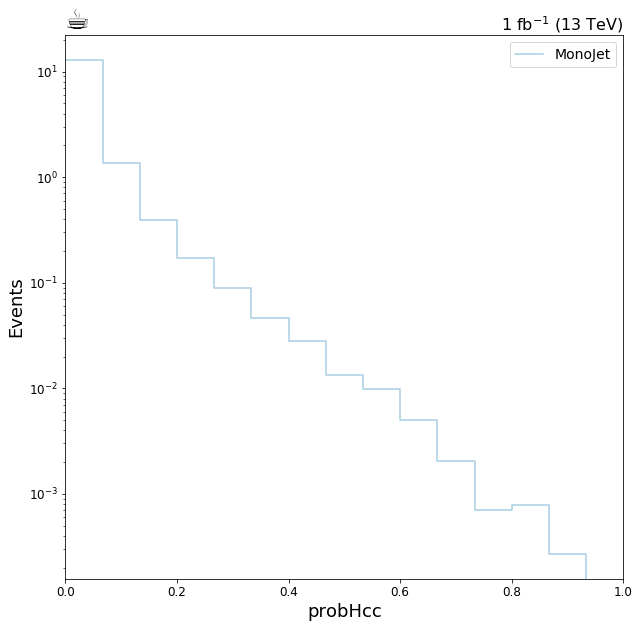

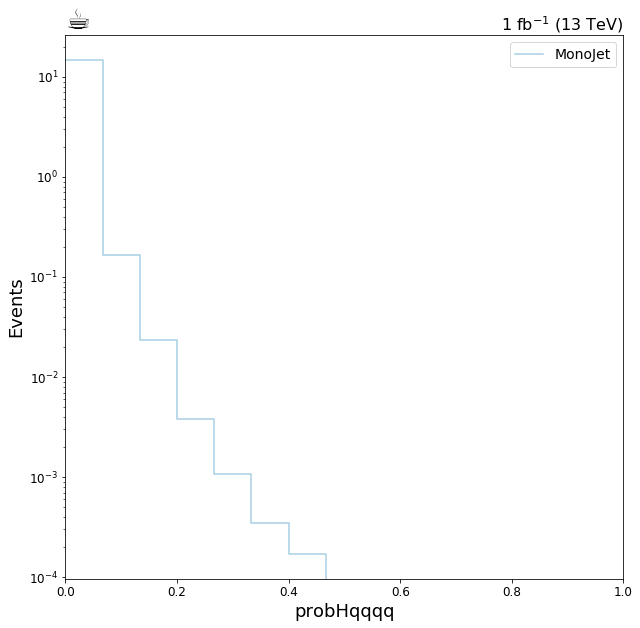

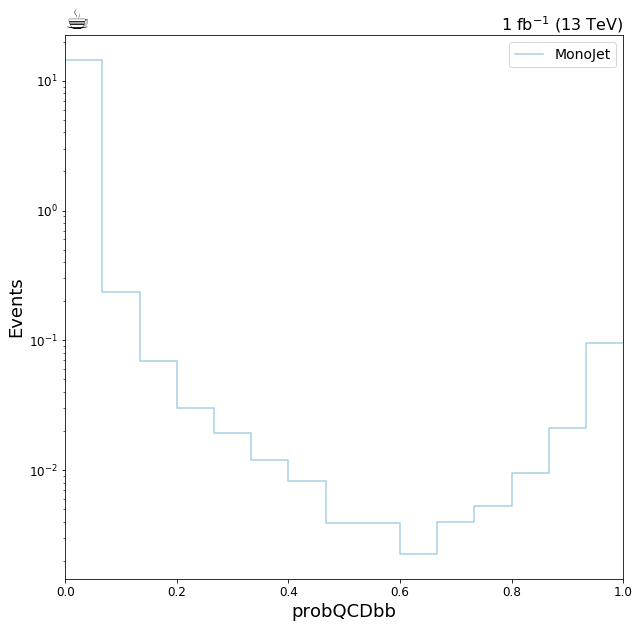

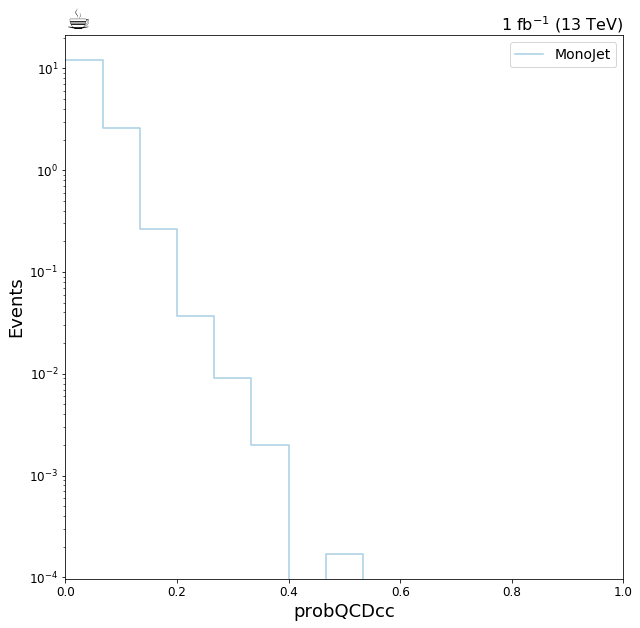

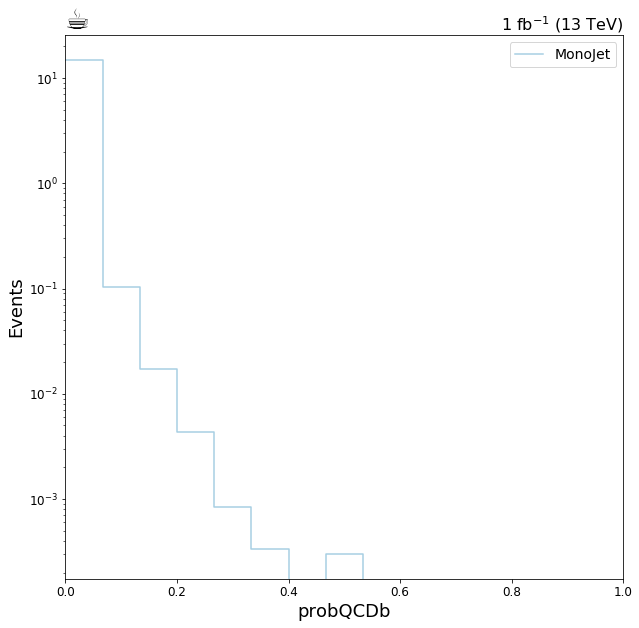

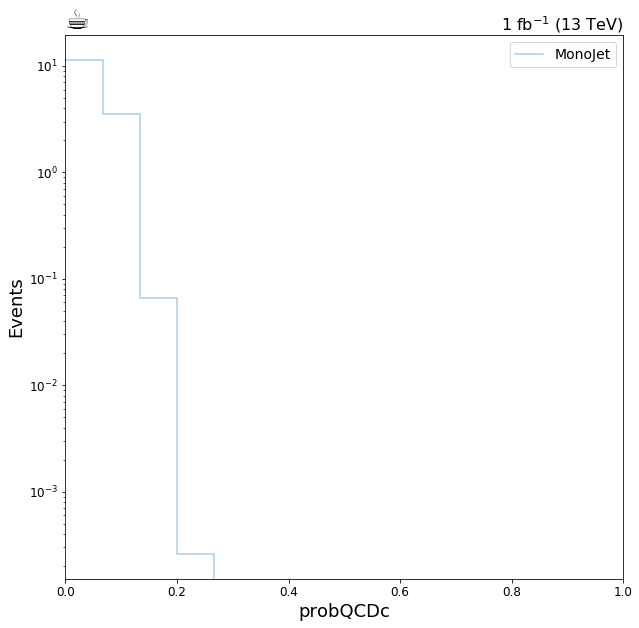

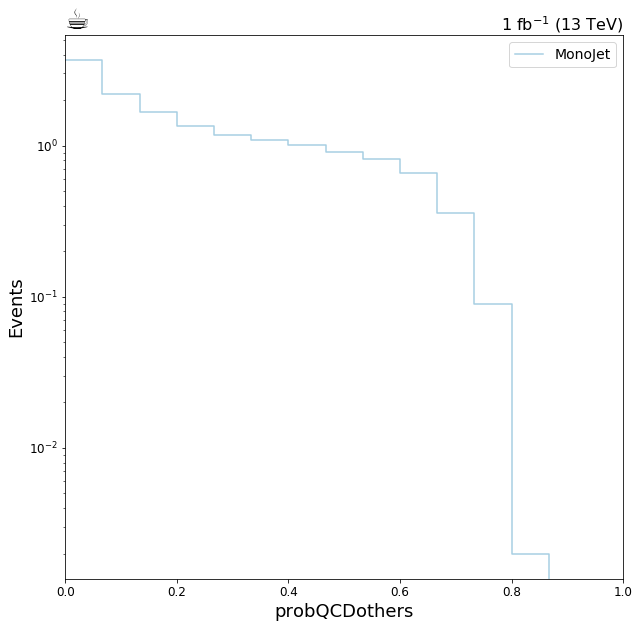

In [9]:
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']


for key in signal_hists.keys():
    if key=='sumw' or key=='mindR' or key=='ledR' or key=='diledR' or key=='recoilVSmindphi': continue
    
    region = 'iszeroL'
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(signal_hists[key].project('jet_selection',jet_selection).project('region',region), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    #plot_path = os.path.abspath('unstack')
    #plot_name = 'unstack'+key+'_'+jet_selection+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))